# Predicting Depression in at-risk Individuals

### Problem statement formation: 
How can the NIMH decrease the median time delay for mental health treatment through the development of an app that screens individuals for mental illnesses?

Context:  According to the NIMH, one in five Americans live with a mental illness. This can include both mental, behavioral, or emotional disorders. In addition, according to the NIMH data from 2017, among the 46.6 million adults with any mental illness, 19.8 million (42.6%) received mental health services in the past year. Furthermore, in 2017, the NIMH identified that 4.5% of all U.S. adults experienced a serious mental illness (SMI), meaning that the SMI substantially interfered with or limited one or more major life activities (Substance Abuse and Mental Health Services Administration, 2018). As the effects of mental illness can be severe, it is prudent to diagnose and treat individuals with mental illness in a timely manner. There are significant delays in diagnosing and treating a mental illness after initial onset (McLaughline, 2004). 

Criteria for Success: The creation of an app that will screen individuals for depressive disorders and refer them to a psychiatrist immediately. Success will be measured by assessing the delay in treatment in upcoming years. It is expected that the median delay time will decrease from 11 years until the first contact with a psychiatrist, to less than one year.

Scope of solution space: This app will be used for adults (age 18 and up) in the United States who believe that they are struggling with their mental health. In the future, this can expand to other countries when data is collected from the WHO.

Constraints: There is a lot of missing data in the BRFSS. Potentially, this could be because people refused to answer due to sensitivity to the topic. Because of this, there could be a confounding variable and missing data will have to be dealt with carefully. In addition, the budget needs to be kept in mind because funding will be allocated from the NIMH for this project according to the likelihood of success.

Stakeholders: Those invested in this project will be the NIMH, the SAMHSA, psychiatric treatment providers and insurance companies.

Data Sources: Data is acquired from the 2001-2010 BRFSS, which includes over 200 items and over 200,000 responses. However, after reviewing the data included related to depression items, the sample size decreases to about 80,000.

Method: I will solve this problem by developing a classification model to predict the presence of a mental illness in individuals using the app. The app will narrow the predictors down to <=10 questions for ease of use.

Deliverables: The deliverables include an app that functions appropriately for adults in the United States, as well as a slide deck that explains how the app was developed and verified. In addition, all the code will be available in a GitHub repo for each step of the project.



In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,9)

In [2]:

import pandas as pd
#import BRFSS 2010 data and select columns of interest
df2=pd.read_csv('https://springboardash.s3.amazonaws.com/10.csv')
df2.shape
df2=df2[['EMTSUPRT', 'LSATISFY','ADPLEASR','ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK','ADMOVE','ADANXEV', 'ADDEPEV']]

In [3]:
#descriptive statistics
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
EMTSUPRT,436221.0,1.974605,1.444904,1.0,1.0,1.0,2.0,9.0
LSATISFY,435968.0,1.688021,0.973586,1.0,1.0,2.0,2.0,9.0
ADPLEASR,79466.0,61.909974,38.298421,1.0,10.0,88.0,88.0,99.0
ADDOWN,79420.0,65.177739,37.122756,1.0,14.0,88.0,88.0,99.0
ADSLEEP,79391.0,50.676638,40.693882,1.0,5.0,88.0,88.0,99.0
ADENERGY,79367.0,36.939232,39.828500,1.0,3.0,14.0,88.0,99.0
ADEAT1,79335.0,59.207676,39.124483,1.0,8.0,88.0,88.0,99.0
ADFAIL,79298.0,74.269868,30.735371,1.0,88.0,88.0,88.0,99.0
ADTHINK,79266.0,73.963553,30.872160,1.0,88.0,88.0,88.0,99.0
ADMOVE,79219.0,79.497684,24.815877,1.0,88.0,88.0,88.0,99.0


In [4]:
#shape of dataframe
df2.shape

(451075, 12)

In [5]:
#column names
df2.columns

Index(['EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY',
       'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE', 'ADANXEV', 'ADDEPEV'],
      dtype='object')

In [6]:
#get unique values for each variable

In [7]:

df2.EMTSUPRT.unique()

array([ 5., nan,  1.,  2.,  3.,  7.,  4.,  9.])

In [8]:
df2['LSATISFY'].unique()
       

array([ 1., nan,  2.,  3.,  4.,  7.,  9.])

In [9]:
df2['ADPLEASR'].unique()

array([nan, 88.,  1.,  8.,  2., 14.,  7., 77., 10.,  3.,  4.,  5., 99.,
       12.,  6.,  9., 11., 13.])

In [10]:
df2['ADDOWN'].unique()

array([nan, 88.,  1., 14.,  3.,  4.,  2., 10.,  5.,  8., 77.,  7.,  6.,
       99.,  9., 12., 13., 11.])

In [11]:
df2['ADSLEEP'].unique()

array([nan,  1., 88.,  4.,  2., 10.,  5.,  3.,  9., 14., 99.,  7., 77.,
        6., 12., 13.,  8., 11.])

In [12]:
df2['ADENERGY'].unique()

array([nan,  1.,  3., 88.,  6.,  2.,  5.,  7.,  4., 14.,  8., 13., 10.,
       77., 99., 12.,  9., 11.])

In [13]:
df2['ADEAT1'].unique()

array([nan,  2., 88.,  3.,  1.,  7., 10.,  4., 14.,  5.,  8.,  6., 99.,
       77., 12.,  9., 11., 13.])

In [14]:
df2['ADFAIL'].unique()

array([nan, 88.,  7.,  3.,  1., 14.,  2., 10.,  9.,  8., 12., 77.,  5.,
        4., 99.,  6., 13., 11.])

In [15]:
df2['ADTHINK'].unique()

array([nan, 88.,  4., 10.,  2.,  1.,  6.,  3., 14.,  5., 12.,  7., 77.,
       99.,  8., 13., 11.,  9.])

In [16]:
df2['ADMOVE'].unique()

array([nan, 88., 10., 14.,  2.,  1., 77.,  7.,  4.,  5.,  6., 99.,  3.,
        8., 12.,  9., 11., 13.])

In [17]:
df2['ADANXEV'].unique()

array([nan,  2.,  1.,  9.,  7.])

In [18]:
df2['ADDEPEV'].unique()

array([nan,  2.,  1.,  9.,  7.])

In [19]:
#create a separate df with mental health related variables
mental_health=df2
mental_health.describe()


,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,ADANXEV,ADDEPEV
count,436221.000000,435968.000000,79466.000000,79420.000000,79391.000000,79367.000000,79335.000000,79298.000000,79266.000000,79219.000000,79160.000000,79104.000000
mean,1.974605,1.688021,61.909974,65.177739,50.676638,36.939232,59.207676,74.269868,73.963553,79.497684,1.892724,1.843459
std,1.444904,0.973586,38.298421,37.122756,40.693882,39.828500,39.124483,30.735371,30.872160,24.815877,0.513281,0.528095
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,10.000000,14.000000,5.000000,3.000000,8.000000,88.000000,88.000000,88.000000,2.000000,2.000000
50%,1.000000,2.000000,88.000000,88.000000,88.000000,14.000000,88.000000,88.000000,88.000000,88.000000,2.000000,2.000000
75%,2.000000,2.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,2.000000,2.000000
max,9.000000,9.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.000000,9.000000


In [20]:
#88 represents 'None', so replace with 0 for all applicable columns
import numpy as np
mental_health.describe()
mental_health.ADPLEASR.unique()
cols=list(mental_health.columns)
cols


mental_health.replace(88, 0, inplace=True)
mental_health.replace(77, np.nan, inplace=True)
mental_health.replace(99, np.nan, inplace=True)
mental_health['ADDEPEV'].replace(to_replace=7, value=np.nan, inplace=True)
mental_health['ADDEPEV'].replace(to_replace=9, value=np.nan, inplace=True)
mental_health['ADDEPEV'].replace(to_replace=2, value=0, inplace=True)

mental_health.EMTSUPRT.unique()
mental_health.LSATISFY.unique()
mental_health['ADDEPEV'].unique()



array([nan,  0.,  1.])

In [21]:
mental_health.columns


Index(['EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY',
       'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE', 'ADANXEV', 'ADDEPEV'],
      dtype='object')

In [22]:
#display number of missing values
nas=pd.DataFrame(mental_health.isnull().sum().sort_values(ascending=False),columns = ['Missing'])
pos = nas['Missing'] > 0
nas[pos]
mental_health.dropna(inplace=True)

In [23]:
nas=pd.DataFrame(mental_health.isnull().sum().sort_values(ascending=False),columns = ['Missing'])
pos = nas['Missing'] > 0
nas[pos]

,Missing


In [24]:

mental_health.describe()

,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,ADANXEV,ADDEPEV
count,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000,72432.000000
mean,1.869174,1.605244,1.656851,1.279172,2.902971,3.638516,2.092625,0.901770,1.004846,0.622184,1.880288,0.176745
std,1.263659,0.722140,3.488507,3.079750,4.559253,4.694482,3.981459,2.805918,2.962154,2.390097,0.414177,0.381455
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,2.000000,2.000000,2.000000,1.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,9.000000,9.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,9.000000,1.000000


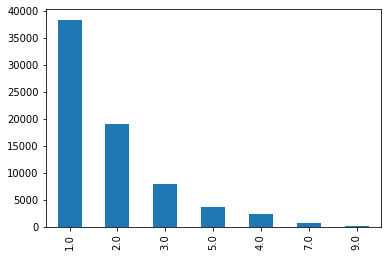

In [25]:
#work with categorical EDA Bar Charts
mental_health['EMTSUPRT'].value_counts().plot(kind='bar')


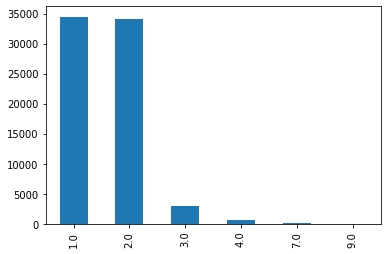

In [26]:
#work with df2 for categorical EDA
mental_health['LSATISFY'].value_counts().plot(kind='bar')

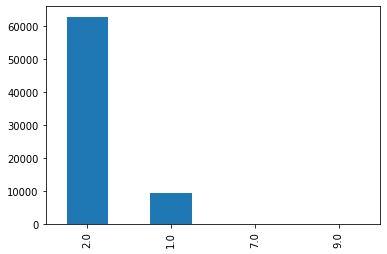

In [27]:
mental_health['ADANXEV'].value_counts().plot(kind='bar')

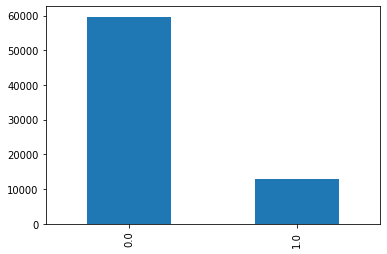

In [28]:
mental_health['ADDEPEV'].value_counts().plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


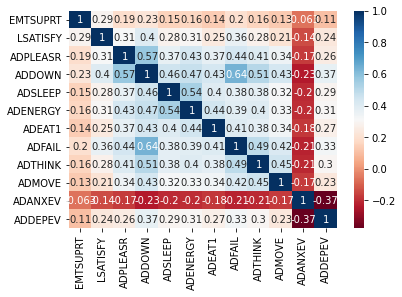

<Figure size 1440x1440 with 0 Axes>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

corrMatrix = mental_health.corr()
sns.heatmap(corrMatrix, annot=True, cmap='RdBu')
plt.figure(figsize=(20,20))
plt.show()
#focus on the AD items as predictors of ADDEPEV

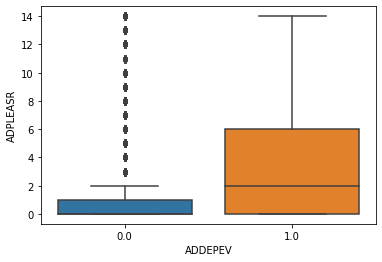

In [30]:
sns.boxplot(data = mental_health, x='ADDEPEV', y='ADPLEASR')



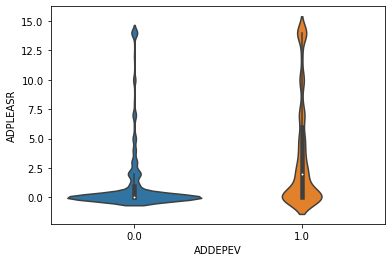

In [31]:
sns.violinplot(data = mental_health, x='ADDEPEV', y='ADPLEASR')


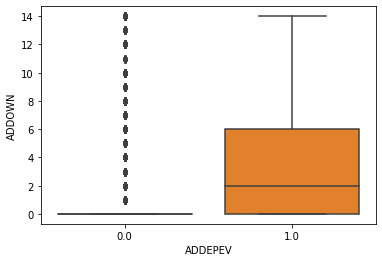

In [32]:
sns.boxplot(data = mental_health, x='ADDEPEV', y='ADDOWN')
#people who reported depression had more days FEELING DOWN DEPRESSED OR HOPELESS

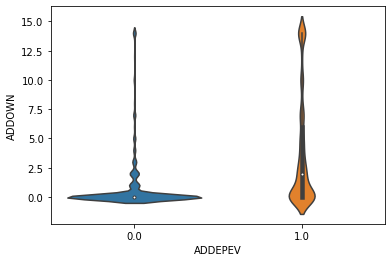

In [33]:
sns.violinplot(data = mental_health, x='ADDEPEV', y='ADDOWN')
#most of the people who didn't get diagnosed with depression reported 0 days of feeling down, depressed or hopeless

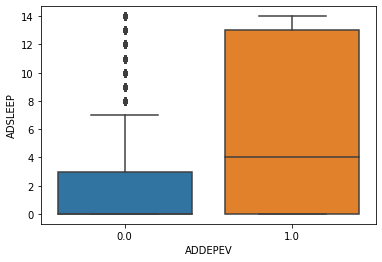

In [34]:
sns.boxplot(data = mental_health, x='ADDEPEV', y='ADSLEEP')
#people who reported depression had greater variability in sleeping patterns

As shown in the above charts, most of the people who didn't get diagnosed with depression reported 0 days of little pleasure and people who reported depression had more days with little pleasure. This trend continues for the other predictor variables. The number of days that people exhibit symptoms of depression is close to zero for those with no depression and it is more varied for those with a depression diagnosis, as expected. This can be used to predict those who should be diagnosed with depression.

In [35]:
mental_health.columns

Index(['EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY',
       'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE', 'ADANXEV', 'ADDEPEV'],
      dtype='object')

In [36]:
mental_health2=pd.get_dummies(mental_health, columns=['EMTSUPRT', 'LSATISFY', 'ADANXEV'])
mental_health2.head(100)

,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,ADDEPEV,EMTSUPRT_1.0,EMTSUPRT_2.0,EMTSUPRT_3.0,EMTSUPRT_4.0,EMTSUPRT_5.0,EMTSUPRT_7.0,EMTSUPRT_9.0,LSATISFY_1.0,LSATISFY_2.0,LSATISFY_3.0,LSATISFY_4.0,LSATISFY_7.0,LSATISFY_9.0,ADANXEV_1.0,ADANXEV_2.0,ADANXEV_7.0,ADANXEV_9.0
9632,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9633,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9634,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9635,8.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9636,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9743,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9744,1.0,0.0,14.0,14.0,2.0,1.0,5.0,2.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
9745,3.0,0.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [37]:
mental_health.ADDEPEV.value_counts()
#0 no 1 yes
#Has a doctor or other healthcare provider EVER told you that you have a depressive disorder (including depression,
#major depression, dysthymia, or minor depression)?

0.0    59630
1.0    12802
Name: ADDEPEV, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#split into X and y variables
X=mental_health2.drop(columns='ADDEPEV')
X.reset_index(drop=True, inplace=True)


In [40]:
y=mental_health['ADDEPEV']
y
y.reset_index(drop=True, inplace=True)



In [41]:
#split training and test data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state=111)

In [42]:
from collections import Counter
Counter(y_train)

Counter({0.0: 47666, 1.0: 10279})

### Modeling
This is a supervised learning classification problem. Therefore I have tested the following classification models:

- Logistic Regression
- K-Nearest Neighbor (KNN)
- Decision Tree
- Random Forest


### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0, solver='lbfgs', max_iter=500).fit(X_train, y_train)
preds = model1.predict(X_test)
LogisticRegression(penalty='l2', class_weight='balanced', C=1)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
params = model1.get_params()
print(params)
model1.classes_

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


array([0., 1.])

In [45]:
model1.score(X_test, y_test)

0.8656726720508041

In [46]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, preds))
print("Precision:",metrics.precision_score(y_test, preds))

Accuracy: 0.8656726720508041
Precision: 0.680651221039449


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model1.predict(X_test))

array([[11454,   510],
       [ 1436,  1087]])

This model does a good job of predicting those with depression, but I think we can do better. We're still missing 510 people with depression iwth this model. 

In [48]:
model2=LogisticRegression(random_state=0, penalty= 'none', solver='lbfgs', max_iter=500).fit(X_train, y_train)
preds2=(model2.predict_proba(X_test)[:,1] >=.4).astype(bool)



In [49]:
params2=model2.get_params()
print(params2)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [50]:
model2.score(X_test, y_test)

0.8656726720508041

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, preds2))
print("Precision:",metrics.precision_score(y_test, preds2))

Accuracy: 0.8630496307033892
Precision: 0.6333498268184067


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds2)

array([[11223,   741],
       [ 1243,  1280]])

The confusion matrix shows that although the score for the model is good, the model is not a good fit because it predicts the that 741 people without depression will have depression, which is not good. Therefore, we will try another model. Perhaps KNN is the better model for this problem.

### KNN

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors':np.arange(5,6)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([5])}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [54]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8348088704806281
Best Parameters: {'n_neighbors': 5}


In [55]:
import sklearn.metrics as metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8406157244426037
[[11301   663]
 [ 1646   877]]


In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.8406157244426037
Precision: 0.5694805194805195


This model also does not do a good job because it predicts everyone as not having depression (high accuracy, low precision).

## SVM

In [57]:
'''from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)'''

"from sklearn import svm\n\n#Create a svm Classifier\nclf = svm.SVC(kernel='linear') # Linear Kernel\n\n#Train the model using the training sets\nclf.fit(X_train, y_train)\n\n#Predict the response for test dataset\ny_pred = clf.predict(X_test)"

In [58]:
'''from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))'''

'from sklearn import metrics\nprint("Accuracy:",metrics.accuracy_score(y_test, y_pred))\nprint("Precision:",metrics.precision_score(y_test, y_pred))'

In [59]:
#print(confusion_matrix(y_test, y_pred))

## Decision Tree
Next, I will try a decision tree and I will tune the hyperparameters to achieve optimal results. First, I will try a decision tree with all the hyperparamters set at the default.

In [60]:
from sklearn import tree

In [61]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)


In [62]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8235659556844067


In [63]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.4921911973497397


In [64]:
print(confusion_matrix(y_test, y_pred))

[[10891  1073]
 [ 1483  1040]]


This initial model does not do a very good job of classifying people with depression because it has a high false positive rate. Next, I will try to tune the criterion and max depth.

In [65]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf2.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
y_pred2=clf2.predict(X_test)

In [67]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8691240422447711


In [68]:
print("Precision:",metrics.precision_score(y_test, y_pred2))

Precision: 0.700832799487508


In [69]:
print(confusion_matrix(y_test, y_pred2))

[[11497   467]
 [ 1429  1094]]


This model does a good job of predicting depression. I specified the entropy model and a max depth of 5. It correctly identifies 1094 people with depression. There are 467 false positives out of 11964 true negatives. This is an acceptable error rate because it correctly detects almost half of the people with depression who may otherwise have not been identified prior to this screening.

## Random Forest
After seeing the positive results from the tuned decision tree analysis, the next step is to try out a Random Forest Classifier.

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [71]:
y_pred_rf=clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.8598053427210602


In [72]:
print("Precision:",metrics.precision_score(y_test, y_pred_rf))

Precision: 0.6467780429594272


In [73]:
print(confusion_matrix(y_test, y_pred_rf))

[[11372   592]
 [ 1439  1084]]


While this model performs fairly well, it doesn't perform as well as the Decision Tree. I also tried the gini model, and I tried out different max depths, but all of the Random Forest Classifiers performed worse than the Decision Tree above. Therefore, my model choice is the Decision Tree, entropy, max_depth=5.
## Final Model: Decision Tree Confusion Matrix

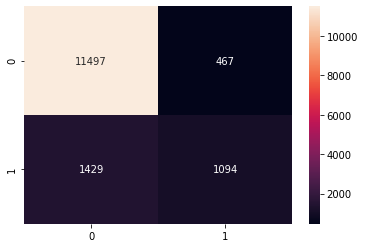

In [74]:
cm=confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='g')